The focus of this notebook is to investigate the problem landscape.
It can also be used to investigate the benefits and disadvantages of GBJ backjumping.

In [1]:
from exact_solver import solve, solve_stp
from problem_generator import generate_problem 

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

from time import perf_counter

In [2]:
from problem_sets import SIMPLE, BINARY

Consider the general trend on the big picture

var 20
0 100.0 20.0
5 96.66666666666667 28.633333333333333
10 63.33333333333333 47.53333333333333
15 10.0 66.56666666666666
20 6.666666666666667 71.46666666666667
25 0.0 72.73333333333333
30 0.0 69.4
35 0.0 73.4
40 0.0 72.93333333333334
45 0.0 74.93333333333334
50 0.0 76.53333333333333
55 0.0 75.33333333333333
60 0.0 75.86666666666666
65 0.0 75.53333333333333
70 0.0 74.93333333333334
75 0.0 76.53333333333333
80 0.0 76.53333333333333
85 0.0 80.66666666666667
90 0.0 79.13333333333334
95 0.0 81.13333333333334
100 0.0 83.4
var 23
0 100.0 23.0
5 86.66666666666667 37.63333333333333
10 46.666666666666664 62.43333333333333
15 6.666666666666667 83.66666666666667
20 0.0 86.0
25 0.0 79.2
30 0.0 79.0
35 0.0 85.0
40 0.0 78.73333333333333
45 0.0 83.4
50 0.0 84.46666666666667
55 0.0 79.46666666666667
60 0.0 85.53333333333333
65 0.0 83.4
70 0.0 84.33333333333333
75 0.0 83.73333333333333
80 0.0 87.66666666666667
85 0.0 89.2
90 0.0 93.73333333333333
95 0.0 92.26666666666667
100 0.0 93.8
var 26
0 100.0 2

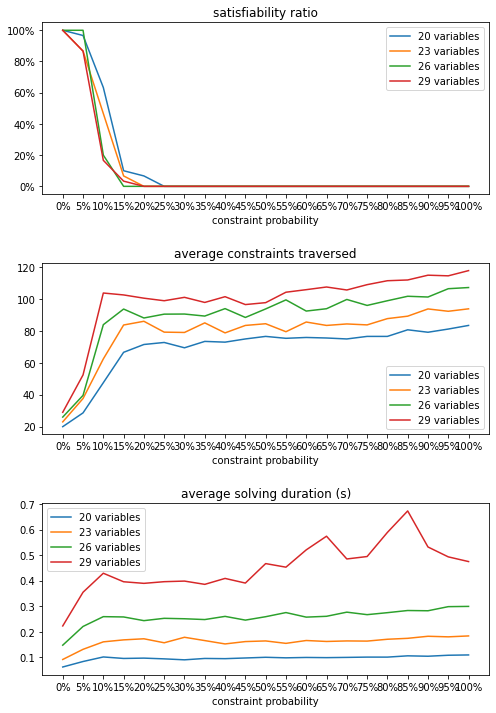

In [3]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration (s)')

runs = 30
for variables in range(20, 31, 3):
    print('var', variables)
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(0, 101, 5):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=False, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

Now zoom in on the interesting part.

var 20
2 100.0 23.833333333333332
4 100.0 27.166666666666668
6 86.66666666666667 34.03333333333333
8 76.66666666666667 40.6
10 73.33333333333333 43.56666666666667
12 43.333333333333336 56.56666666666667
14 33.33333333333333 62.666666666666664
16 26.666666666666668 65.96666666666667
18 3.3333333333333335 72.9
20 0.0 73.53333333333333
22 0.0 76.66666666666667
24 0.0 71.66666666666667
var 23
2 100.0 27.9
4 93.33333333333333 35.03333333333333
6 80.0 43.4
8 63.33333333333333 53.333333333333336
10 50.0 61.666666666666664
12 33.33333333333333 70.3
14 10.0 82.56666666666666
16 6.666666666666667 83.83333333333333
18 0.0 84.6
20 0.0 85.4
22 0.0 83.13333333333334
24 0.0 83.2
var 26
2 100.0 31.733333333333334
4 96.66666666666667 38.63333333333333
6 86.66666666666667 48.266666666666666
8 46.666666666666664 67.16666666666667
10 16.666666666666664 82.73333333333333
12 10.0 91.1
14 0.0 94.8
16 3.3333333333333335 92.6
18 0.0 93.66666666666667
20 0.0 92.6
22 0.0 94.06666666666666
24 0.0 89.0
var 29
2 10

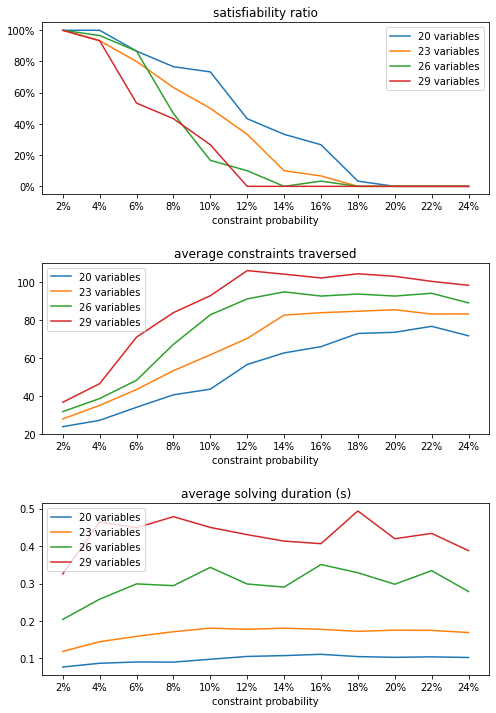

In [4]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration (s)')

runs = 30
for variables in range(20, 31, 3):
    print('var', variables)
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(2, 25, 2):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=False, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

Now let's consider another problem set, such as BINARY.

var 8
15 96.66666666666667 15.6
17 90.0 15.833333333333334
19 90.0 19.433333333333334
21 93.33333333333333 20.666666666666668
23 76.66666666666667 55.333333333333336
25 76.66666666666667 45.266666666666666
27 76.66666666666667 45.333333333333336
29 76.66666666666667 43.36666666666667
31 60.0 76.43333333333334
33 46.666666666666664 54.8
35 63.33333333333333 74.86666666666666
37 43.333333333333336 102.73333333333333
39 36.666666666666664 119.2
var 9
15 90.0 24.766666666666666
17 83.33333333333334 44.43333333333333
19 93.33333333333333 25.4
21 90.0 40.36666666666667
23 66.66666666666666 66.9
25 86.66666666666667 52.96666666666667
27 63.33333333333333 129.96666666666667
29 50.0 131.53333333333333
31 60.0 88.53333333333333
33 56.666666666666664 142.4
35 30.0 195.36666666666667
37 26.666666666666668 190.26666666666668
39 16.666666666666664 249.4
var 10
15 90.0 30.933333333333334
17 80.0 64.4
19 80.0 52.53333333333333
21 63.33333333333333 138.76666666666668
23 73.33333333333333 126.8333333333

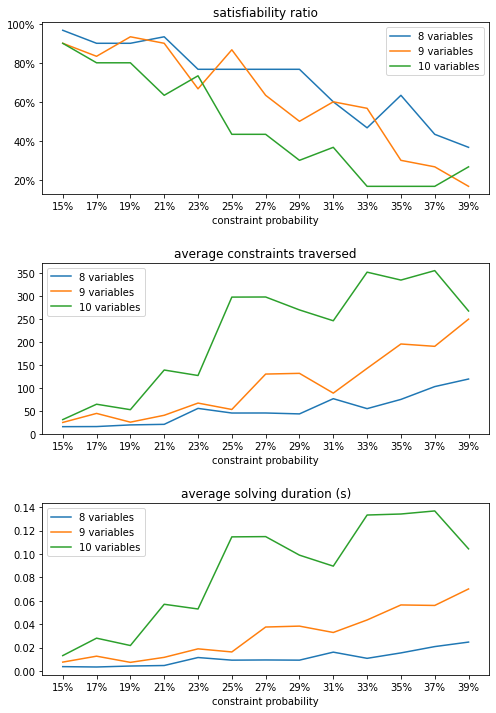

In [5]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration (s)')

runs = 30
for variables in range(8, 11, 1):
    print('var', variables)
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(15, 40, 2):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 'variables': variables, 'constraint_probability': prob/100,
                                   'scaling_factor': 0.2,
                                   })
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=False, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

same thing with backjumping:

var 8
15 100.0 11.433333333333334
17 93.33333333333333 15.7
19 96.66666666666667 13.766666666666667
21 83.33333333333334 22.733333333333334
23 80.0 29.166666666666668
25 86.66666666666667 25.4
27 70.0 34.0
29 86.66666666666667 27.6
31 56.666666666666664 63.5
33 70.0 44.7
35 50.0 62.333333333333336
37 56.666666666666664 62.266666666666666
39 43.333333333333336 64.7
var 9
15 100.0 13.333333333333334
17 80.0 28.5
19 93.33333333333333 21.566666666666666
21 73.33333333333333 43.06666666666667
23 66.66666666666666 72.06666666666666
25 56.666666666666664 62.9
27 73.33333333333333 58.4
29 63.33333333333333 74.2
31 43.333333333333336 93.2
33 33.33333333333333 121.33333333333333
35 43.333333333333336 80.53333333333333
37 40.0 106.03333333333333
39 30.0 171.26666666666668
var 10
15 83.33333333333334 67.66666666666667
17 83.33333333333334 50.36666666666667
19 70.0 61.46666666666667
21 63.33333333333333 79.4
23 50.0 148.43333333333334
25 53.333333333333336 84.86666666666666
27 40.0 134.066666666666

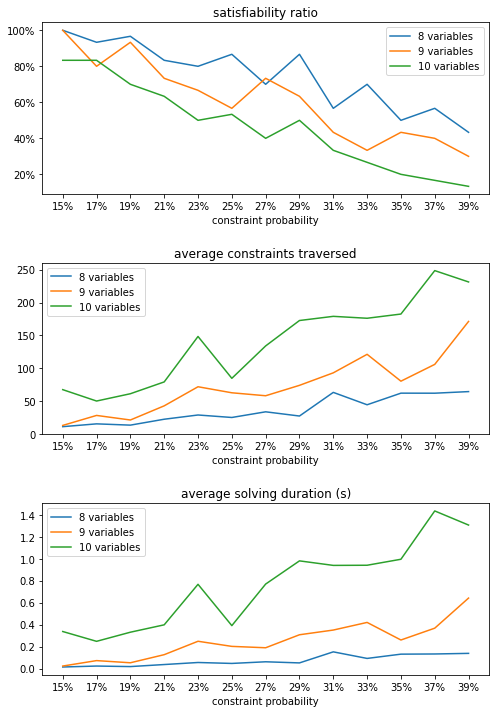

In [6]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration (s)')

runs = 30
for variables in range(8, 11, 1):
    print('var', variables)
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(15, 40, 2):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 'variables': variables, 'constraint_probability': prob/100,
                                   'scaling_factor': 0.2,
                                   })
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=True, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

var 8
0 100.0 8.0
10 96.66666666666667 10.966666666666667
20 96.66666666666667 14.533333333333333
30 63.33333333333333 34.0
40 46.666666666666664 77.2
50 10.0 87.83333333333333
60 6.666666666666667 91.63333333333334
70 0.0 95.16666666666667
80 0.0 81.83333333333333
90 0.0 84.83333333333333
100 0.0 58.2
var 9
0 100.0 9.0
10 96.66666666666667 12.8
20 70.0 32.3
30 56.666666666666664 84.76666666666667
40 20.0 99.73333333333333
50 6.666666666666667 136.26666666666668
60 6.666666666666667 147.06666666666666
70 0.0 174.2
80 0.0 127.26666666666667
90 0.0 114.53333333333333
100 0.0 66.06666666666666
var 10
0 100.0 10.0
10 96.66666666666667 17.433333333333334
20 80.0 56.96666666666667
30 36.666666666666664 141.8
40 3.3333333333333335 279.6666666666667
50 0.0 172.16666666666666
60 0.0 208.96666666666667
70 0.0 202.1
80 0.0 196.83333333333334
90 0.0 141.2
100 0.0 87.53333333333333


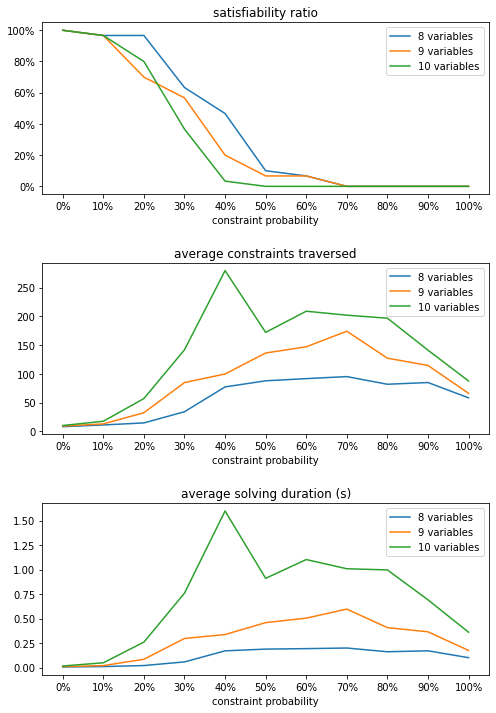

In [7]:



























# extra:
# backjumping on full range (because it gets better for overconstrained)
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration (s)')

runs = 30
for variables in range(8, 11, 1):
    print('var', variables)
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(0, 101, 10):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 'variables': variables, 'constraint_probability': prob/100,
                                   'scaling_factor': 0.2,
                                   })
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=True, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()